In [3]:
# 2025/12/13
# zhangzhong
# https://docs.langchain.com/oss/python/langgraph/overview

## Lang Graph Core benefits
# - LangGraph provides low-level supporting infrastructure for any long-running, stateful workflow or agent. LangGraph does not abstract prompts or architecture, and provides the following central benefits:
# - Durable execution: Build agents that persist through failures and can run for extended periods, resuming from where they left off.
# - Human-in-the-loop: Incorporate human oversight by inspecting and modifying agent state at any point.
# - Comprehensive memory: Create stateful agents with both short-term working memory for ongoing reasoning and long-term memory across sessions.
# - Debugging with LangSmith: Gain deep visibility into complex agent behavior with visualization tools that trace execution paths, capture state transitions, and provide detailed runtime metrics.
# - Production-ready deployment: Deploy sophisticated agent systems confidently with scalable infrastructure designed to handle the unique challenges of stateful, long-running workflows.

from langgraph.graph import StateGraph, MessagesState, START, END
from IPython.display import Image, display


def mock_llm(state: MessagesState):
    return {"messages": [{"role": "ai", "content": "hello world"}]}


def test_lang_graph_hello_world():
    # Build the smallest possible LangGraph:
    # - MessagesState tracks chat turns.
    # - Nodes are callables that take state and return an updated state dict.
    graph = StateGraph(MessagesState)

    # Register our single node. Its name defaults to the function name
    # ("mock_llm"), which we use when wiring edges below.
    graph.add_node(mock_llm)

    # Tell the graph to start at START, route to our node, then finish at END.
    # Edges must form a path from START to END or compile() will fail.
    graph.add_edge(START, "mock_llm")
    graph.add_edge("mock_llm", END)

    # compile() freezes the topology and returns a runnable app with .invoke().
    graph = graph.compile()

    # Kick off one pass through the graph with an initial user message.
    # The mock LLM node appends its reply and returns the new state.
    graph.invoke({"messages": [{"role": "user", "content": "hi!"}]})

    display(Image(graph.get_graph().draw_mermaid_png()))


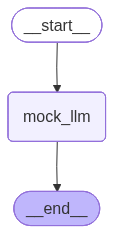

In [4]:
test_lang_graph_hello_world()